# Anaplerotic Reactions Subsystem

Set the model environment

In [1]:
import cobra.test
import pandas as pd
import numpy as np
import pandas as pd
import escher
from escher import Builder
from cobra.sampling import sample
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 5000)
pd.set_option('display.width',1000)
pd.set_option('display.max_colwidth',None)
model = cobra.io.load_json_model('./e_coli_core.json') # Model must be in the same directory

Set parameter Username
Academic license - for non-commercial use only - expires 2022-10-10


The glycoxylate cycle and gluconeogenic reactions are necessary to allow *E. coli* to grow on 3-carbon (pyruvate) and 4-carbon compounds (malate, fumarate, and succinate). This occurs by avoiding the loss of carbon to carbon dioxide in the TCA cycle (glycoxylate cycle), providing a pathway for generation of glycolytic intermediates from TCA intermediates (anapleurotic reactions), and reversing the carbon flux through glycolysis (gluconeogenesis) to produce essential precursors for biosynthesis.

The location of the glycoxylate cycle, gluconeogenesis, and anaplerotic reactions on the *E.coli* core map is shown in Figure 1 below.

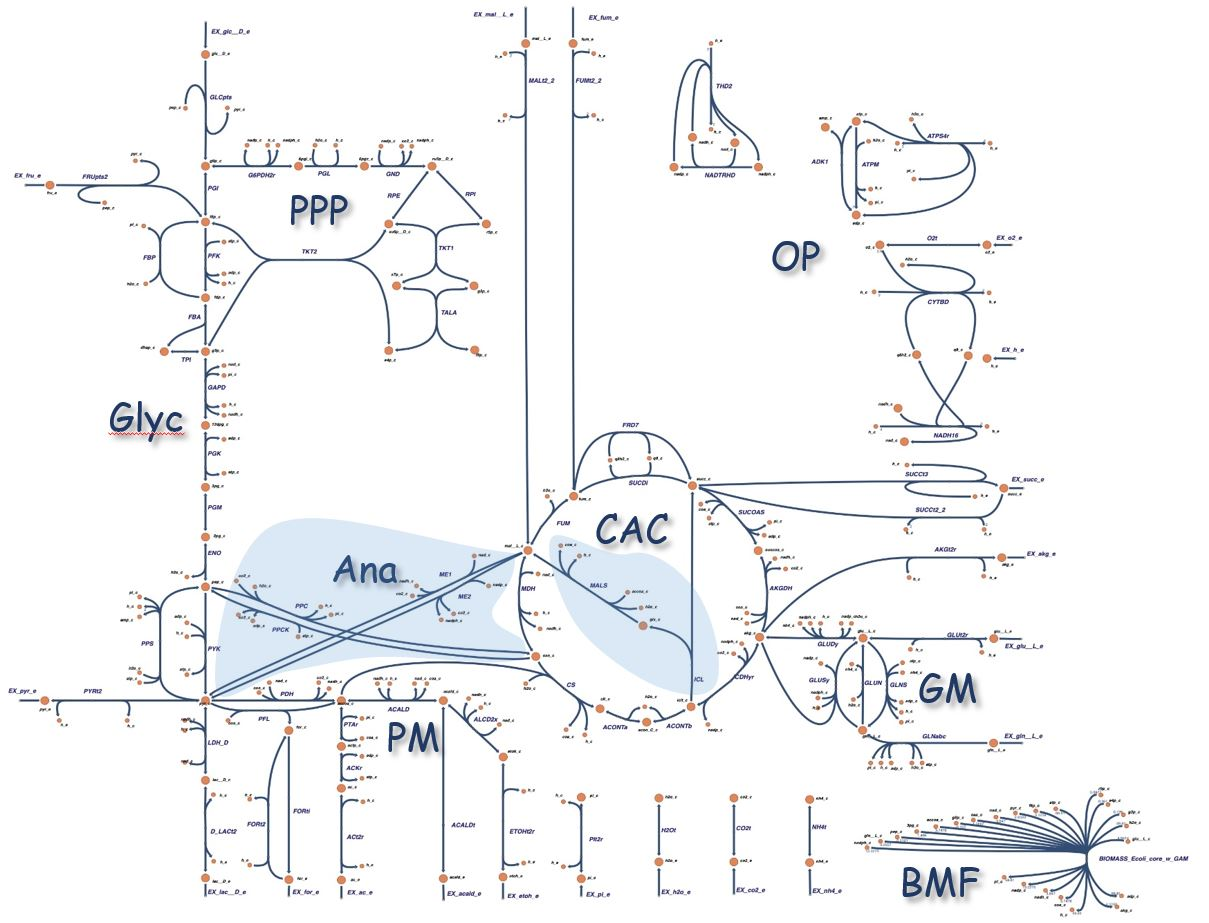

            Figure 1. Glycoxylate cycle and anaplerotic reactions highlighted in blue on the E.coli core map.

The reactions included in this section on the glycoxylate cycle and the anaplerotic reactions are shown below.  This subsystem is referred to in the core model as the "Anaplerotic reactions" subsystem.

In [2]:
reaction_names = [r.name for r in model.reactions]
reaction_ids = [r.id for r in model.reactions]
reaction_formula = [r.reaction for r in model.reactions]
reaction_subsystem = [r.subsystem for r in model.reactions]
reactionList = {'Reaction ID': reaction_ids,
                'Reaction Name': reaction_names,
                'Reaction Formula': reaction_formula,
                'Reaction Subsystem': reaction_subsystem,
               }

df = pd.DataFrame(reactionList, columns= ['Reaction ID','Reaction Name','Reaction Formula','Reaction Subsystem'])
# Select the reactions associated with the desired subsystem
SSindex = []
for i in range(len(reaction_subsystem)):
    if reaction_subsystem[i] == 'Anaplerotic reactions':
        SSindex.append(i)
df.loc[SSindex]

,Reaction ID,Reaction Name,Reaction Formula,Reaction Subsystem
12,PPC,Phosphoenolpyruvate carboxylase,co2_c + h2o_c + pep_c --> h_c + oaa_c + pi_c,Anaplerotic reactions
16,PPCK,Phosphoenolpyruvate carboxykinase,atp_c + oaa_c --> adp_c + co2_c + pep_c,Anaplerotic reactions
83,ICL,Isocitrate lyase,icit_c --> glx_c + succ_c,Anaplerotic reactions
85,MALS,Malate synthase,accoa_c + glx_c + h2o_c --> coa_c + h_c + mal__L_c,Anaplerotic reactions
88,ME1,Malic enzyme (NAD),mal__L_c + nad_c --> co2_c + nadh_c + pyr_c,Anaplerotic reactions
89,ME2,Malic enzyme (NADP),mal__L_c + nadp_c --> co2_c + nadph_c + pyr_c,Anaplerotic reactions


These individual reactions associated with the glycoxylate cycle and the anaplerotic reactions are graphically shown in Figure 2. 

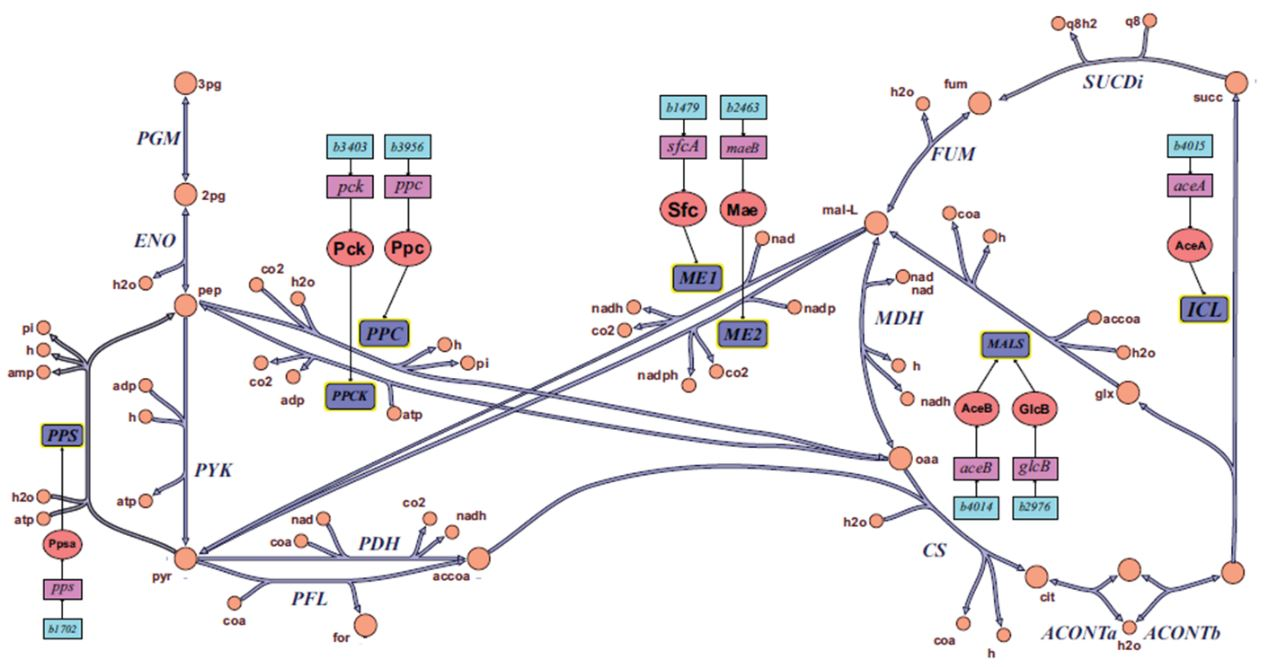

            Figure 3. Reactions associated with the glycoxylate cycle and the anapleurotic reactions [1].

The anaplerotic reactions (PPC, PPS, PPCK, ME1, and ME2 ) are interconnecting, reversing and bypassing reactions that replenish TCA cycle intermediates. The glycoxylate cycle (CS, ACONTa, ACONTb, ICL, MALS, MDH, SUCDi and FUM), which includes some TCA cycle reactions, is essential for growth on 3-carbon (pyruvate) and 4-carbon compounds since it can convert the precursor acetyl-CoA into glycolytic intermediates without loss of carbon to carbon dioxide (ICDHyr & AKGDH). Finally, growth on 4-carbon intermediates of the TCA cycle, such as malate, requires that the cell be able to produce phosphoenolpyruvate (pep_c) for gluconeogenesis. Gluconeogenesis refers to the reversal of flux through the glycolytic pathway. There are two pathways able to fulfill these pep_c demands. The first pathway involves the conversion of malate (mal_c) to pyruvate (pyr_c) by a malic enzyme (ME1 or ME2). This is followed by the synthesis of pep_c from pyr_c by phosphoenolpyruvate synthase (PPS). Malic enzyme (ME1) reduces one molecule of nad_c to nadh_c while converting mal_c to pyr_c. A second parallel reaction, ME2 reduces one molecule of nadp_c to nadph_c.

Now it is time to explore the the impact on the cell of these pathways for different carbon sources. Let's look at the aerobic operation of the cell growing on acetate.

In [3]:
model = cobra.io.load_json_model('./e_coli_core.json')
# Set the inputs
model.reactions.EX_o2_e.lower_bound = -1000 # Aerobic condition
model.reactions.EX_glc__D_e.lower_bound = -0
model.reactions.EX_ac_e.lower_bound = -10
# Optimize
Acetate_aerobic_flux = model.optimize()
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_e,10,2,100.00%
h_e,EX_h_e,6.523,0,0.00%
nh4_e,EX_nh4_e,0.9452,0,0.00%
o2_e,EX_o2_e,12.42,0,0.00%
pi_e,EX_pi_e,0.6377,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-12.62,1,100.00%
h2o_e,EX_h2o_e,-13.89,0,0.00%


The Escher map

In [4]:
builder = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder

Builder()

In [5]:
builder.reaction_data = Acetate_aerobic_flux.fluxes

The active non-zero fluxes for this simulaton are given below. 

In [6]:
nz = Acetate_aerobic_flux.fluxes
nz = nz.replace(0, np.nan)
nz = nz.dropna(how='all', axis=0)
nz

PGI                         -0.035534
PGK                          0.460786
PGM                          0.720100
PIt2r                        0.637661
ACKr                        10.000000
ACONTa                       7.552529
ACONTb                       7.552529
ATPM                         8.390000
PPCK                         0.810081
ACt2r                       10.000000
AKGDH                        5.567680
ATPS4r                      24.504890
PTAr                       -10.000000
BIOMASS_Ecoli_core_w_GAM     0.173339
CO2t                       -12.623490
RPE                         -0.124596
CS                           7.552529
RPI                         -0.124596
CYTBD                       24.846186
ENO                         -0.720100
SUCDi                        7.365514
SUCOAS                      -5.567680
TALA                        -0.031010
TKT1                        -0.031010
TKT2                        -0.093586
TPI                         -0.172420
EX_ac_e     

It can be seen, using the map and the fluxes listed above, that acetate enters the network at the bottom and flows into the TCA cycle. From there it can be observed that not only is the full TCA cycle operational but so is the glycoxolate cycle. Part of the oaa_c metabolite flux is then directed through the glycolysis pathway (gluconeogenesis) to the pentose phosphate pathway to create the 4-, 5- and 7-carbon precursors precursors. 

Now using malate as a carbon source under aerobic conditions is another good example of the role of the glycoxylate cycle, gluconeogenesis, and anapleurotic reactions. 

In [7]:
model = cobra.io.load_json_model('./e_coli_core.json')
# Set the inputs
model.reactions.EX_o2_e.lower_bound = -1000 # Aerobic condition
model.reactions.EX_glc__D_e.lower_bound = -0
model.reactions.EX_mal__L_e.lower_bound = -10
# Optimize
Malate_aerobic_flux = model.optimize()
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
h_e,EX_h_e,12.56,0,0.00%
mal__L_e,EX_mal__L_e,10,4,100.00%
nh4_e,EX_nh4_e,2.022,0,0.00%
o2_e,EX_o2_e,13.79,0,0.00%
pi_e,EX_pi_e,1.364,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-24.22,1,100.00%
h2o_e,EX_h2o_e,-16.92,0,0.00%


The Escher map

In [8]:
builder2 = Builder(
    map_name='e_coli_core.Core metabolism', 
    model_name='e_coli_core', 
)
builder2

Builder()

In [9]:
builder2.reaction_data = Malate_aerobic_flux.fluxes

The active fluxes for this simulaton are given below. 

In [10]:
nz2 = Malate_aerobic_flux.fluxes
nz2 = nz2.replace(0, np.nan)
nz2 = nz2.dropna(how='all', axis=0)
nz2

PGI                         -0.076002
PGK                          0.985540
PGM                          1.540167
PIt2r                        1.363843
ACONTa                       4.765292
ACONTb                       4.765292
ATPM                         8.390000
PPCK                         1.732619
AKGDH                        4.365300
ATPS4r                      29.011647
BIOMASS_Ecoli_core_w_GAM     0.370741
CO2t                       -24.222952
RPE                         -0.266488
CS                           4.765292
RPI                         -0.266488
CYTBD                       27.588677
ENO                         -1.540167
SUCDi                        4.365300
SUCOAS                      -4.365300
TALA                        -0.066325
TKT1                        -0.066325
TKT2                        -0.200163
TPI                         -0.368776
EX_co2_e                    24.222952
EX_h_e                     -12.562945
EX_h2o_e                    16.923574
EX_mal__L_e 

In this situation, the malate enters the network from the top and flows to the TCA cycle. Part of the malate metabolite flux is converted to be used as the pyruvate precursor while the rest enters the fully operational TCA cycle. Note that the glycoxolate cycle is inactive. Part of the oaa_c metabolite flux is then directed through the glycolysis pathway (gluconeogenesis), to the pentose phosphate pathway, to create the 4-, 5- and 7-carbon precursors.

# References

1. Orth, Fleming, and Palsson (2010), EcoSal Chapter 10.2.1 - Reconstruction and Use of Microbial Metabolic Networks: the Core Escherichia coli Metabolic Model as an Educational Guide  